In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
cd /content/drive/My Drive/datacovd19/test/result

[Errno 2] No such file or directory: '/content/drive/My Drive/datacovd19/test/result'
/content


In [0]:
#ls

In [6]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 121kB/s 


In [7]:
!pip install -U efficientnet==0.0.4

  Created wheel for efficientnet: filename=efficientnet-0.0.4-cp36-none-any.whl size=14288 sha256=025172b2feecb2f684cef73f20e1630e4cb2ee2adc7bad489f76e8b57737d69e
  Stored in directory: /root/.cache/pip/wheels/5c/34/68/a611a699a28239e964ccf144c0e767cdb5439fee82ec5de6e0
Successfully built efficientnet


In [8]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 35kB/s 
     |████████████████████████████████| 491kB 38.6MB/s 
     |████████████████████████████████| 3.2MB 60.1MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [9]:
# dataset preparation for segmentation
#%% Training  file
# Run this cell if running this notebook for the first time
#!pip install -U --pre segmentation-models --user 
#!conda install -c conda-forge albumentations
import os
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
# Name experiment
experiment_name = "exp-1"

# Import libs
import os 
import time
import cv2
from tqdm import tqdm
import numpy as np
import skimage.draw
import random
import keras
import matplotlib.pyplot as plt
import matplotlib.colors
import scipy.io as sio
from PIL import Image
import scipy
import scipy.ndimage
import keras.backend as K
#import segmentation_models as sm
import numpy as np
import pandas as pd
import gc
import keras

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split,StratifiedKFold

from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras.engine import InputSpec
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras import optimizers
from keras.legacy import interfaces
from keras.utils.generic_utils import get_custom_objects

from keras.engine.topology import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers.core import Dense, Lambda
from keras.layers.merge import concatenate, add
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, Permute
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

import glob
import shutil
import os
import random
from PIL import Image


from sklearn.utils import shuffle
from os.path import isfile, join
import keras

# Standard dependencies
import cv2
import time
import scipy as sp
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
from functools import partial
import matplotlib.pyplot as plt

# Machine Learning
import tensorflow as tf
import keras
from keras import initializers
from keras import regularizers
from keras import constraints
from keras import backend as K
from keras.activations import elu
from keras.optimizers import Adam
from keras.models import Sequential
from keras.engine import Layer, InputSpec
from keras.utils.generic_utils import get_custom_objects
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Conv2D, Flatten, GlobalAveragePooling2D, Dropout
from sklearn.metrics import cohen_kappa_score
import pydicom

import json

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
from keras import layers
from keras.callbacks import Callback, ModelCheckpoint
from keras.models import Sequential
from keras.optimizers import Adam
from tqdm import tqdm

  
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:
def create_directory(directory):
    '''
    Creates a new folder in the specified directory if the folder doesn't exist.
    INPUT
        directory: Folder to be created, called as "folder/".
    OUTPUT
        New folder in the current directory.
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)
# Define paths
dataset_name = "."
base_path = os.path.abspath(".")
dataset_path = os.path.join(base_path, dataset_name)
dataset_path = base_path
path=os.path.join(dataset_path,'datacovd19')
log_path = os.path.join(path,"log", experiment_name)

In [11]:
# check directory or image folder and see how many images are there
log_path = os.path.join(path, "logs", experiment_name)
patchsize = 256


# For full data training
full_data_path = os.path.join(base_path)

print(log_path)
print(os.listdir(dataset_path))


# Make directory
create_directory(log_path)


# Get the data

# Training data
x_train_dir = os.path.join(dataset_path,'datacovd19', 'train', 'images')
y_train_dir = os.path.join(dataset_path,'datacovd19', 'train', 'masks')

# Validation data
x_valid_dir = os.path.join(dataset_path,'datacovd19', 'val', 'images')
y_valid_dir = os.path.join(dataset_path,'datacovd19' ,'val', 'masks')

# Test data
x_test_dir = x_valid_dir 
y_test_dir = y_valid_dir 

print("Training and validation samples: ", len(os.listdir(x_train_dir)), len(os.listdir(x_valid_dir)))

/content/drive/My Drive/datacovd19/logs/exp-1
['caf.zip', 'pan-map.zip', 'The Direct Linear Transform Algorithm.gslides', 'Colab Notebooks', 'pan&nie_project.zip', 'Untitled0.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'Segmentationmodels_prepration.ipynb', 'Untitled5.ipynb', 'datacovd19', 'cov19', 'model.png']
Training and validation samples:  2840 680


In [12]:
#Test the dataset class
# Load a random image from the images folder
image_fns = sorted(next(os.walk(x_train_dir))[2])
gt_fns = sorted(next(os.walk(y_train_dir))[2])
print(image_fns[:3], gt_fns[:3])

# Get random number
idx = random.randrange(len(image_fns))
print("Index: ", idx)

import skimage
from skimage import io
# Read image and mask
image = io.imread(os.path.join(x_train_dir, image_fns[idx]))
gt = io.imread(os.path.join(y_train_dir, gt_fns[idx]))

# Flags
#assert image.shape[:2] == gt.shape, "Wrong image or ground truth!"
#assert image.dtype == gt.dtype, "Wrong data types!"

print(image.shape, gt.shape)

val1 = gt.flatten()
print("Ground truth classes: ", np.unique(val1))

['1.png', '10.png', '100.png'] ['1.png', '10.png', '100.png']
Index:  1209
(256, 256) (256, 256)
Ground truth classes:  [0 1 2 3]


In [0]:
#Dataloader and utility functions
    
# Helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    
    norm=plt.Normalize(0,4) # 5 classes including BG
    map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","blue"])

    
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap=map_name, norm=norm)
    plt.show()
    
    
# Helper function for data visualization    
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x

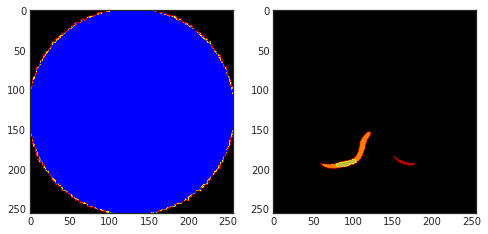

In [14]:

import matplotlib.colors
# Stolen from https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale 
norm=plt.Normalize(0,4) # 5 classes including BG
map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","blue"])

f, axarr = plt.subplots(1,2, figsize=(8,8))

# idx = 94 all classes

axarr[0].imshow(image, cmap=map_name, norm=norm)
axarr[1].imshow(gt, cmap=map_name, norm=norm)

In [0]:
# Classes for data loading and preprocessing
class Dataset:
    """Dataset. Read images, apply augmentation and preprocessing transformations.
    
    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    
    CLASSES = ['RightLung', 'LeftLung', 'Disease', 'unlabelled']

    
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        
        
        # Sorted
        self.images_fps = sorted([os.path.join(images_dir, image_id) for image_id in self.ids])
        self.masks_fps = sorted([os.path.join(masks_dir, image_id) for image_id in self.ids])

        
        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls) for cls in classes] # cls used instead of cls.lower()

        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # Read data
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #image = skimage.io.imread(self.images_fps[i])
        
        
        mask = cv2.imread(self.masks_fps[i], 0)
        #mask = skimage.io.imread(self.masks_fps[i])
        
        
        # Extract certain classes from mask
        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')
        
        # Add background if mask is not binary
        if mask.shape[-1] != 1:
            background = 1 - mask.sum(axis=-1, keepdims=True)
            mask = np.concatenate((mask, background), axis=-1)
        
        # Apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # Apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image, mask
        
    def __len__(self):
        return len(self.ids)

In [0]:
# class for datalader into batch of data
class Dataloder(keras.utils.Sequence):
    """Load data from dataset and form batches
    
    Args:
        dataset: instance of Dataset class for image loading and preprocessing.
        batch_size: Integet number of images in batch.
        shuffle: Boolean, if `True` shuffle image indexes each epoch.
    """
    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

        self.on_epoch_end()

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        # Transpose list of lists
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        
        return batch
    
    def __len__(self):
        """Denotes the number of batches per epoch"""
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        """Callback function to shuffle indexes each epoch"""
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

In [17]:
# dataset check function, dataset class should produce data into tuples(images, labels)
med= ['RightLung', 'LeftLung', 'Disease']
dataset = Dataset(x_train_dir, y_train_dir, classes=med)
images,labels=dataset[10]
print(images.shape)
print(labels.shape)

(256, 256, 3)
(256, 256, 4)


(256, 256, 3) (256, 256, 4)


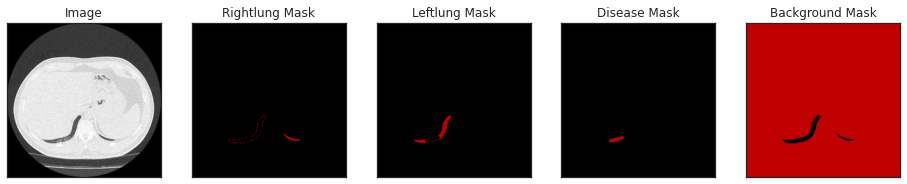

In [18]:
med= ['RightLung', 'LeftLung', 'Disease']

dataset = Dataset(x_train_dir, y_train_dir, classes=med)
image, mask = dataset[idx] 

print(image.shape, mask.shape)
visualize(
    image=image, 
    RightLung_mask = mask[..., 1].squeeze(),
    LeftLung_mask = mask[..., 2].squeeze(),
    Disease_mask = mask[..., 3].squeeze(),
    background_mask = mask[..., 0].squeeze(),
)

(256, 256, 3) (256, 256, 4)


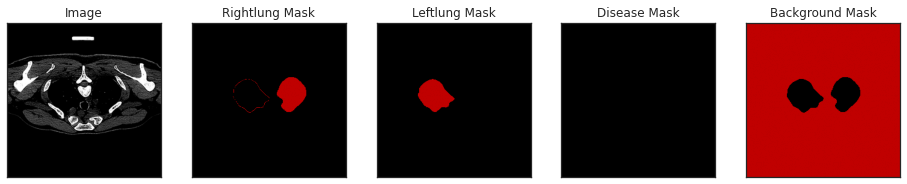

(256, 256, 3) (256, 256, 4)


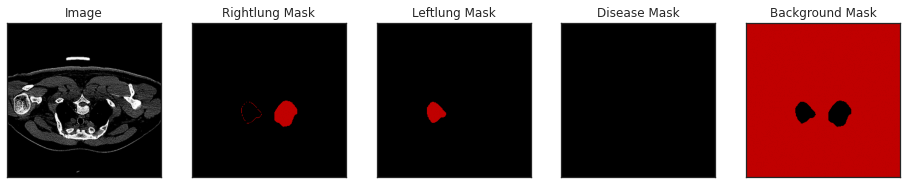

(256, 256, 3) (256, 256, 4)


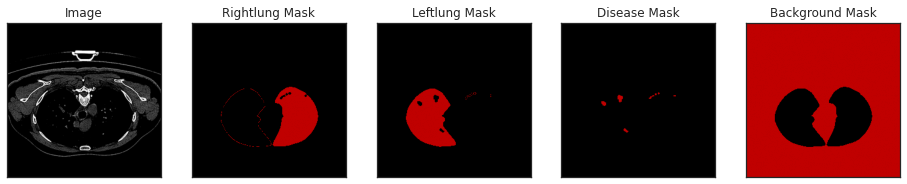

(256, 256, 3) (256, 256, 4)


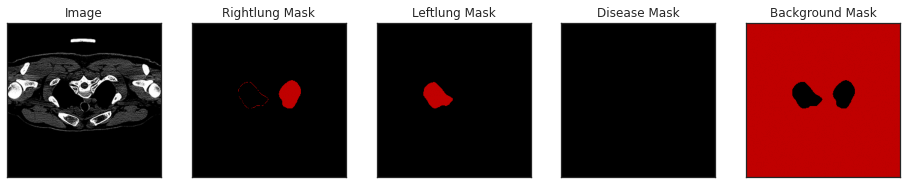

(256, 256, 3) (256, 256, 4)


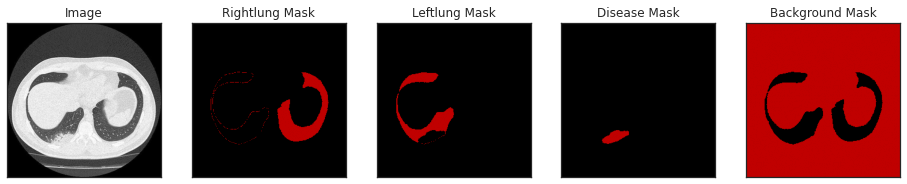

In [19]:
med= ['RightLung', 'LeftLung', 'Disease']

dataset = Dataset(x_train_dir, y_train_dir, classes=med)

for i in range(5):
    
    image, mask = dataset[random.randrange(len(dataset))] # get some sample randomly
    print(image.shape, mask.shape)
    
    visualize(
    image=image, 
    RightLung_mask = mask[..., 1].squeeze(),
    LeftLung_mask = mask[..., 2].squeeze(),
    Disease_mask = mask[..., 3].squeeze(),
    background_mask = mask[..., 0].squeeze(),
    )

In [0]:
# preprocessing and augmentation of dataset
# https://pypi.org/project/albumentations/    # check more detail about segmentation augmentation
import albumentations as A

def round_clip_0_1(x, **kwargs):
    return x.round().clip(0, 1)

# define heavy augmentations
def get_training_augmentation():
    train_transform = [

        A.HorizontalFlip(p=0.5),

        A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

        #A.PadIfNeeded(min_height=patchsize, min_width=patchsize, always_apply=True, border_mode=0), # patchsize instead of 320
        A.RandomCrop(height=patchsize, width=patchsize, always_apply=True), # patchsize instead of 320

        A.IAAAdditiveGaussianNoise(p=0.2),
        #A.IAAPerspective(p=0.5),

        #A.OneOf(
         #   [
          #      A.CLAHE(p=1),
           #     A.RandomBrightness(p=1),
            #    A.RandomGamma(p=1),
           # ],
           # p=0.9,
       # ),

        #A.OneOf(
       #     [
     #           A.IAASharpen(p=1),
       #         A.Blur(blur_limit=3, p=1),
       #         A.MotionBlur(blur_limit=3, p=1),
      #      ],
       #     p=0.9,
       # ),

        #A.OneOf(
        #    [
         #       A.RandomContrast(p=1),
        #        A.HueSaturationValue(p=1),
        #    ],
       #     p=0.9,
       # ),
       # A.Lambda(mask=round_clip_0_1)
    ]
    return A.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 96"""
    test_transform = [
        A.PadIfNeeded(patchsize, patchsize)
    ]
    return A.Compose(test_transform)

def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        A.Lambda(image=preprocessing_fn),
    ]
    return A.Compose(_transform)

(256, 256, 3) (256, 256, 4)


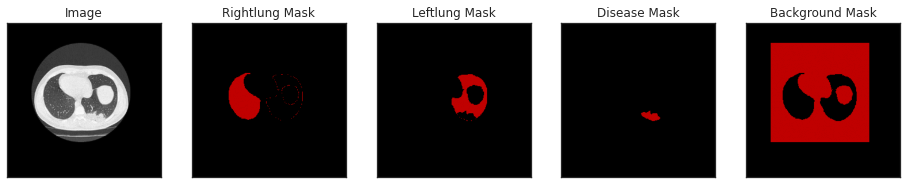

(256, 256, 3) (256, 256, 4)


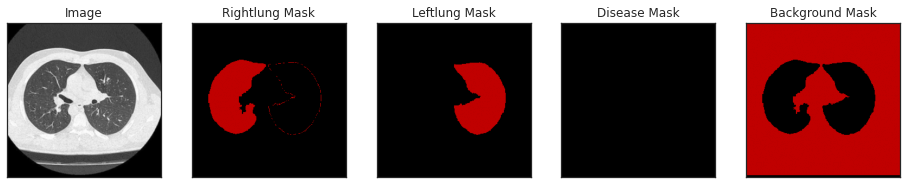

(256, 256, 3) (256, 256, 4)


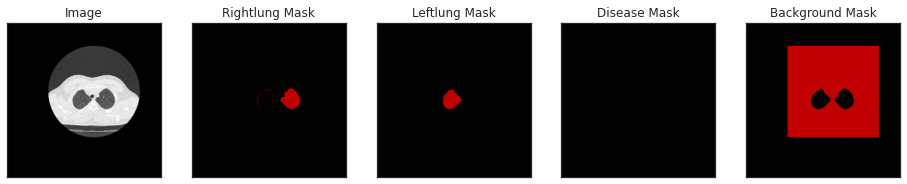

(256, 256, 3) (256, 256, 4)


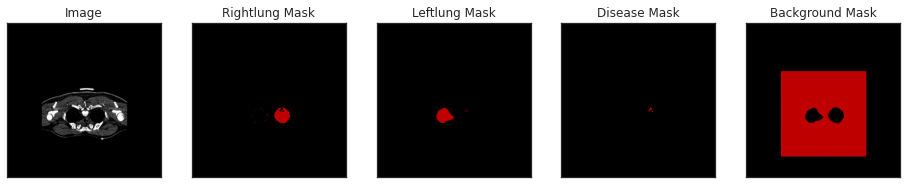

(256, 256, 3) (256, 256, 4)


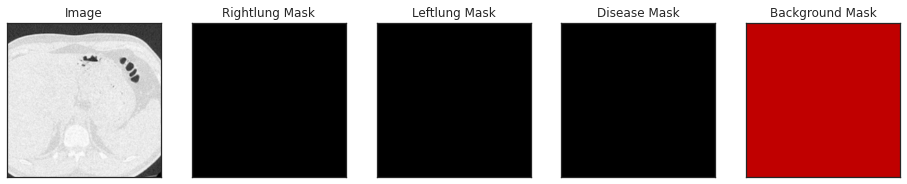

In [21]:
dataset = Dataset(x_train_dir, y_train_dir, classes=med, augmentation=get_training_augmentation()) # if use augmentation function
for i in range(5):
    
    image, mask = dataset[random.randrange(len(dataset))] # get some sample
    print(image.shape, mask.shape)
    
    visualize(
    image=image, 
    RightLung_mask = mask[..., 1].squeeze(),
    LeftLung_mask = mask[..., 2].squeeze(),
    Disease_mask = mask[..., 3].squeeze(),
    background_mask = mask[..., 0].squeeze(),
    )

In [0]:
# dataset with training images and masks
n_classes=4
CLASSES=med
# Dataset for train images
train_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    classes=CLASSES,
    augmentation=get_training_augmentation(),
    #preprocessing=get_preprocessing(preprocess_input),
)

In [23]:
len(train_dataset)

2840

In [24]:
iamges, labels=train_dataset[0]
print(images.shape)
print(labels.shape)

(256, 256, 3)
(256, 256, 4)


In [25]:
dir(train_dataset)

['CLASSES',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'augmentation',
 'class_values',
 'ids',
 'images_fps',
 'masks_fps',
 'preprocessing']

In [26]:
print(train_dataset.class_values)

[0, 1, 2]


In [27]:
train_dataset.images_fps

['/content/drive/My Drive/datacovd19/train/images/1.png',
 '/content/drive/My Drive/datacovd19/train/images/10.png',
 '/content/drive/My Drive/datacovd19/train/images/100.png',
 '/content/drive/My Drive/datacovd19/train/images/1000.png',
 '/content/drive/My Drive/datacovd19/train/images/1001.png',
 '/content/drive/My Drive/datacovd19/train/images/1002.png',
 '/content/drive/My Drive/datacovd19/train/images/1003.png',
 '/content/drive/My Drive/datacovd19/train/images/1004.png',
 '/content/drive/My Drive/datacovd19/train/images/1005.png',
 '/content/drive/My Drive/datacovd19/train/images/1006.png',
 '/content/drive/My Drive/datacovd19/train/images/1007.png',
 '/content/drive/My Drive/datacovd19/train/images/1008.png',
 '/content/drive/My Drive/datacovd19/train/images/1009.png',
 '/content/drive/My Drive/datacovd19/train/images/101.png',
 '/content/drive/My Drive/datacovd19/train/images/1010.png',
 '/content/drive/My Drive/datacovd19/train/images/1011.png',
 '/content/drive/My Drive/datac

In [28]:
train_dataset.masks_fps

['/content/drive/My Drive/datacovd19/train/masks/1.png',
 '/content/drive/My Drive/datacovd19/train/masks/10.png',
 '/content/drive/My Drive/datacovd19/train/masks/100.png',
 '/content/drive/My Drive/datacovd19/train/masks/1000.png',
 '/content/drive/My Drive/datacovd19/train/masks/1001.png',
 '/content/drive/My Drive/datacovd19/train/masks/1002.png',
 '/content/drive/My Drive/datacovd19/train/masks/1003.png',
 '/content/drive/My Drive/datacovd19/train/masks/1004.png',
 '/content/drive/My Drive/datacovd19/train/masks/1005.png',
 '/content/drive/My Drive/datacovd19/train/masks/1006.png',
 '/content/drive/My Drive/datacovd19/train/masks/1007.png',
 '/content/drive/My Drive/datacovd19/train/masks/1008.png',
 '/content/drive/My Drive/datacovd19/train/masks/1009.png',
 '/content/drive/My Drive/datacovd19/train/masks/101.png',
 '/content/drive/My Drive/datacovd19/train/masks/1010.png',
 '/content/drive/My Drive/datacovd19/train/masks/1011.png',
 '/content/drive/My Drive/datacovd19/train/mask

In [0]:
# dataset for validtion images and masks
# Dataset for validation images
valid_dataset = Dataset(
    x_valid_dir, 
    y_valid_dir, 
    classes=CLASSES ,
    #augmentation=get_validation_augmentation(),
    #preprocessing=get_preprocessing(preprocess_input),
)

In [30]:
len(valid_dataset) # total length of validation dataset

680

In [0]:
# Dataset for validation images
valid_dataset = Dataset(
    x_valid_dir, 
    y_valid_dir, 
    classes=CLASSES ,
    augmentation=get_validation_augmentation(),
    #preprocessing=get_preprocessing(preprocess_input),
)

In [32]:
len(valid_dataset)

680

In [0]:
# datagenerator used for training and validation
BATCH_SIZE=16
train_dataloader = Dataloder(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [34]:
images,labels=next(iter(train_dataloader))
print(images.shape)
print(labels.shape)

(16, 256, 256, 3)
(16, 256, 256, 4)


In [0]:
BATCH_SIZE=16
valid_dataloader = Dataloder(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [36]:
EPOCHS=100
# Test validation loader
x , y = next(iter(valid_dataloader))
print(x.shape, y.shape)

(16, 256, 256, 3) (16, 256, 256, 4)


In [0]:
# design yoour model, compile model for training

In [0]:
# different loss function and performance metrics used in compilation and training the model
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = y_true_f * y_pred_f
    score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return 1. - score

def bce_dice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

#ComboLoss
#The main idea of using Combo loss is very simple:
#
#Tversky Loss and weighted bce -> reduce the false positive Focal Loss -> Learn hard samples in training set
#
#SOURCE : https://www.kaggle.com/xiejialun/seunet-with-comboloss-swish
#

def Tversky_Loss(y_true, y_pred, smooth = 1, alpha = 0.3, beta = 0.7, flatten = False):
    
    if flatten:
        y_true = K.flatten(y_true)
        y_pred = K.flatten(y_pred)
    
    TP = K.sum(y_true * y_pred)
    FP = K.sum((1-y_true) * y_pred)
    FN = K.sum(y_true * (1-y_pred))
    
    tversky_coef = (TP + smooth) / (TP + alpha * FP + beta * FN + smooth)
    
    return 1 - tversky_coef

def Focal_Loss(y_true, y_pred, alpha = 0.8, gamma = 2.0, flatten = False):
    
    if flatten:
        y_true = K.flatten(y_true)
        y_pred = K.flatten(y_pred)    
    
    bce = keras.losses.binary_crossentropy(y_true, y_pred)
    bce_exp = K.exp(-bce)
    
    loss = K.mean(alpha * K.pow((1-bce_exp), gamma) * bce)
    return loss

def weighted_bce(weight = 0.6):
    
    def convert_2_logits(y_pred):
        y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1 - K.epsilon())
        return tf.log(y_pred / (1-y_pred))
    
    def weighted_binary_crossentropy(y_true, y_pred):
        y_pred = convert_2_logits(y_pred)
        loss = tf.nn.weighted_cross_entropy_with_logits(logits = y_pred, targets = y_true, pos_weight = weight)
        return loss
    
    return weighted_binary_crossentropy

def Combo_Loss(y_true, y_pred, a = 0.4, b = 0.2, c= 0.4):
    
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    
    return a*weighted_bce()(y_true, y_pred) + b*Focal_Loss(y_true_f, y_pred_f) + c*Tversky_Loss(y_true_f, y_pred_f)

def Dice_coef(y_true, y_pred, smooth = 1):

    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
 
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def Dice_loss(y_true, y_pred):   
    return  1.0 - Dice_coef(y_true, y_pred)

In [39]:
# design your model here
#Useful model blocks

def convolution_block(x, filters, size, strides=(1,1), padding='same', activation=True):
    x = Conv2D(filters, size, strides=strides, padding=padding)(x)
    x = BatchNormalization()(x)
    if activation == True:
        x = LeakyReLU(alpha=0.1)(x)
    return x

def residual_block(blockInput, num_filters=16):
    x = LeakyReLU(alpha=0.1)(blockInput)
    x = BatchNormalization()(x)
    blockInput = BatchNormalization()(blockInput)
    x = convolution_block(x, num_filters, (3,3) )
    x = convolution_block(x, num_filters, (3,3), activation=False)
    x = Add()([x, blockInput])
    return x

#Model Architecture (Efficient unet++)
#As mentioned above, this model uses pretrained EfficientNetB4 model as encoder. I use Residual blocks in the decoder part.

from efficientnet import EfficientNetB4

def UEfficientNet(input_shape=(None, None, 3),dropout_rate=0.1):

    backbone = EfficientNetB4(weights='imagenet',
                            include_top=False,
                            input_shape=input_shape)
    input = backbone.input
    start_neurons = 8

    conv4 = backbone.layers[342].output
    conv4 = LeakyReLU(alpha=0.1)(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(dropout_rate)(pool4)
    
     # Middle
    convm = Conv2D(start_neurons * 32, (3, 3), activation=None, padding="same",name='conv_middle')(pool4)
    convm = residual_block(convm,start_neurons * 32)
    convm = residual_block(convm,start_neurons * 32)
    convm = LeakyReLU(alpha=0.1)(convm)
    
    deconv4 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(convm)
    deconv4_up1 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(deconv4)
    deconv4_up2 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(deconv4_up1)
    deconv4_up3 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(deconv4_up2)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(dropout_rate)(uconv4) 
    
    uconv4 = Conv2D(start_neurons * 16, (3, 3), activation=None, padding="same")(uconv4)
    uconv4 = residual_block(uconv4,start_neurons * 16)
#     uconv4 = residual_block(uconv4,start_neurons * 16)
    uconv4 = LeakyReLU(alpha=0.1)(uconv4)  #conv1_2
    
    deconv3 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(uconv4)
    deconv3_up1 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(deconv3)
    deconv3_up2 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(deconv3_up1)
    conv3 = backbone.layers[154].output
    uconv3 = concatenate([deconv3,deconv4_up1, conv3])    
    uconv3 = Dropout(dropout_rate)(uconv3)
    
    uconv3 = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(uconv3)
    uconv3 = residual_block(uconv3,start_neurons * 8)
#     uconv3 = residual_block(uconv3,start_neurons * 8)
    uconv3 = LeakyReLU(alpha=0.1)(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv3)
    deconv2_up1 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(deconv2)
    conv2 = backbone.layers[92].output
    uconv2 = concatenate([deconv2,deconv3_up1,deconv4_up2, conv2])
        
    uconv2 = Dropout(0.1)(uconv2)
    uconv2 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv2)
    uconv2 = residual_block(uconv2,start_neurons * 4)
#     uconv2 = residual_block(uconv2,start_neurons * 4)
    uconv2 = LeakyReLU(alpha=0.1)(uconv2)
    
    deconv1 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv2)
    conv1 = backbone.layers[30].output
    uconv1 = concatenate([deconv1,deconv2_up1,deconv3_up2,deconv4_up3, conv1])
    
    uconv1 = Dropout(0.1)(uconv1)
    uconv1 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv1)
    uconv1 = residual_block(uconv1,start_neurons * 2)
#     uconv1 = residual_block(uconv1,start_neurons * 2)
    uconv1 = LeakyReLU(alpha=0.1)(uconv1)
    
    uconv0 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv1)   
    uconv0 = Dropout(0.1)(uconv0)
    uconv0 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv0)
    uconv0 = residual_block(uconv0,start_neurons * 1)
#     uconv0 = residual_block(uconv0,start_neurons * 1)
    uconv0 = LeakyReLU(alpha=0.1)(uconv0)
    
    uconv0 = Dropout(dropout_rate/2)(uconv0)
    output_layer = Conv2D(4, (1,1), padding="same", activation="sigmoid")(uconv0)    
    
    model = Model(input, output_layer)
    model.name = 'u-Efficients'
    #model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss=Combo_Loss, metrics=[dice_coef])
    
    return model

K.clear_session()
img_size = 256
model = UEfficientNet(input_shape=(img_size,256,3),dropout_rate=0.5)
model.summary()



Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
71720960/71719528 [==============================] - 1s 0us/step

Instructions for updating:
targets is deprecated, use labels instead
Model: "u-Efficients"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 48) 1296        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 48) 192         conv2d_1[0][0]                   
______________________________________________________________________

In [0]:
# some callback used for monitoring the loss and dice coefficients
# must check this path log_path
log_path='datacovd19/logs'
BATCH_SIZE = 3
CLASSES =['RightLung', 'LeftLung', 'Disease']
LR = 1e-4   # 1e-4(0.0001) 
EPOCHS = 10

# Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbacks = [
    keras.callbacks.ModelCheckpoint('{}/{}.h5'.format(log_path, experiment_name), monitor='val_dice_coef', save_best_only=True, mode='min'),
    keras.callbacks.ReduceLROnPlateau(monitor='val_dice_coef', factor=0.1, verbose=1, patience=5, mode='min'), ## new_lr = lr * factor # 5
    keras.callbacks.EarlyStopping(monitor='val_dice_coef', min_delta=0, verbose=1, patience=15, mode='min', restore_best_weights=True), # 8
    keras.callbacks.CSVLogger('{}/training.csv'.format(log_path))
]

In [0]:
# training the models
start_time = time.time()


history = model.fit_generator(
    train_dataloader, 
    steps_per_epoch=len(train_dataloader), 
    epochs=EPOCHS, 
    callbacks=callbacks, 
    validation_data=valid_dataloader, 
    validation_steps=len(valid_dataloader),  # val samples = batch size * no of steps
)

end_time = time.time()
print("--- Time taken to train : %s hours ---" % ((end_time - start_time)//3600))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
176/177 [============================>.] - ETA: 9s - loss: 0.2982 - dice_coef: 0.5431 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 29 could not be retrieved. It could be because a worker has died.
  UserWarning)


177/177 [==============================] - 1945s 11s/step - loss: 0.2981 - dice_coef: 0.5431 - val_loss: 0.1538 - val_dice_coef: 0.7471
Epoch 2/10
177/177 [==============================] - 1591s 9s/step - loss: 0.1651 - dice_coef: 0.7129 - val_loss: 0.0702 - val_dice_coef: 0.8868
Epoch 3/10
177/177 [==============================] - 1580s 9s/step - loss: 0.1116 - dice_coef: 0.8023 - val_loss: 0.0584 - val_dice_coef: 0.9189
Epoch 4/10
177/177 [==============================] - 1561s 9s/step - loss: 0.0837 - dice_coef: 0.8530 - val_loss: 0.0323 - val_dice_coef: 0.9356
Epoch 5/10
177/177 [==============================] - 1534s 9s/step - loss: 0.0694 - dice_coef: 0.8802 - val_loss: 0.0254 - val_dice_coef: 0.9561
Epoch 6/10
177/177 [==============================] - 1519s 9s/step - loss: 0.0607 - dice_coef: 0.8970 - val_loss: 0.0175 - val_dice_coef: 0.9623

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/10
177/177 [==============================] 

In [0]:
# save model weights
model.load_weights('{}/{}.h5'.format(log_path, experiment_name))

In [45]:
# how to validate the model using test images and save predicted masks
import nibabel as nib
import cv2
import numpy as np
import os
import natsort
# path200=os.path.join(path,'val')
# print(path200)
path1='/content/drive/My Drive/datacovd19/test/'  # path for loading test images

oslist=os.listdir(path1)
filesnew=natsort.natsorted(oslist)
path_savemask='/content/drive/My Drive/datacovd19/test/result/' # path for saving predicted mask
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory) 

import natsort
import matplotlib.pyplot as plt
import numpy as np
im_height=0
im_width=0
img_rows=256
img_cols=256
from tqdm import tqdm
for i, volume in enumerate(filesnew):
    #print(i)
    print(volume)
    cur_path = os.path.join(path1, volume)
    files=natsort.natsorted(os.listdir(cur_path))
    #train_ids = next(os.walk(path1+"images"))
    alist=[]
    for n, id_ in tqdm(enumerate(files), total=len(files)):
        print(n)
        print(id_)
        imgg=cv2.imread(os.path.join(cur_path,id_))
        # rgb= cv2.cvtColor(imgg,cv2.COLOR_GRAY2RGB)
        image = np.expand_dims(imgg, axis=0)
        #stacked_img = np.stack((imgg,)*3, axis=-1)
        pr_mask = model.predict(image)  # predict labels from model, also check the prediction size
        pr_mask1 = np.argmax(pr_mask.squeeze(), axis=-1) # take the index of maximum probabilty for all class, this is output segmentation map
        #pr_mask1 = pr_mask.squeeze()
        #pr_mask1=pr_mask.squeeze()
        print("Uniques in label and predicted", np.unique(pr_mask1)) # check unique labels predicted by our model
        savpath=os.path.join(path_savemask,str(volume)) # save path 
        createFolder(savpath)
        cv2.imwrite(savpath+'/'+str(n)+'.png',pr_mask1) # save predicted mask in folders
        #img.save(savpath+'\\'+str(n)++ ".png")
        alist.append(pr_mask1)
print("Done!")
print(os.path.join(cur_path,id_))

  1%|▏         | 1/78 [00:00<00:13,  5.74it/s]

radiopaedia_4_85506_1
0
1.png
Uniques in label and predicted [0 1 2]
1
2.png


  3%|▎         | 2/78 [00:00<00:22,  3.45it/s]

Uniques in label and predicted [0 1 2]
2
3.png


  4%|▍         | 3/78 [00:01<00:25,  2.90it/s]

Uniques in label and predicted [0 1 2]
3
4.png


  5%|▌         | 4/78 [00:01<00:27,  2.72it/s]

Uniques in label and predicted [0 1 2]
4
5.png


  6%|▋         | 5/78 [00:02<00:27,  2.63it/s]

Uniques in label and predicted [0 1 2]
5
6.png


  8%|▊         | 6/78 [00:02<00:26,  2.69it/s]

Uniques in label and predicted [0 1 2]
6
7.png


  9%|▉         | 7/78 [00:02<00:25,  2.74it/s]

Uniques in label and predicted [0 1 2]
7
8.png


 10%|█         | 8/78 [00:03<00:25,  2.70it/s]

Uniques in label and predicted [0 1 2]
8
9.png


 12%|█▏        | 9/78 [00:03<00:27,  2.55it/s]

Uniques in label and predicted [0 1 2]
9
10.png


 13%|█▎        | 10/78 [00:04<00:29,  2.28it/s]

Uniques in label and predicted [0 1 2]
10
11.png


 14%|█▍        | 11/78 [00:04<00:31,  2.13it/s]

Uniques in label and predicted [0 1 2]
11
12.png


 15%|█▌        | 12/78 [00:05<00:28,  2.30it/s]

Uniques in label and predicted [0 1 2]
12
13.png


 17%|█▋        | 13/78 [00:05<00:26,  2.45it/s]

Uniques in label and predicted [0 1 2]
13
14.png


 18%|█▊        | 14/78 [00:05<00:27,  2.34it/s]

Uniques in label and predicted [0 1 2]
14
15.png


 19%|█▉        | 15/78 [00:06<00:25,  2.43it/s]

Uniques in label and predicted [0 1 2]
15
16.png


 21%|██        | 16/78 [00:07<00:50,  1.24it/s]

Uniques in label and predicted [0 1 2]
16
17.png


 22%|██▏       | 17/78 [00:08<00:41,  1.49it/s]

Uniques in label and predicted [0 1 2]
17
18.png


 23%|██▎       | 18/78 [00:08<00:37,  1.61it/s]

Uniques in label and predicted [0 1 2]
18
19.png


 24%|██▍       | 19/78 [00:09<00:33,  1.78it/s]

Uniques in label and predicted [0 1 2]
19
20.png


 26%|██▌       | 20/78 [00:09<00:29,  1.98it/s]

Uniques in label and predicted [0 1 2]
20
21.png


 27%|██▋       | 21/78 [00:10<00:27,  2.06it/s]

Uniques in label and predicted [0 1 2]
21
22.png


 28%|██▊       | 22/78 [00:10<00:27,  2.02it/s]

Uniques in label and predicted [0 1 2]
22
23.png


 29%|██▉       | 23/78 [00:10<00:24,  2.21it/s]

Uniques in label and predicted [0 1 2]
23
24.png


 31%|███       | 24/78 [00:11<00:22,  2.36it/s]

Uniques in label and predicted [0 1 2]
24
25.png


 32%|███▏      | 25/78 [00:11<00:22,  2.36it/s]

Uniques in label and predicted [0 1 2]
25
26.png


 33%|███▎      | 26/78 [00:12<00:20,  2.51it/s]

Uniques in label and predicted [0 1 2]
26
27.png


 35%|███▍      | 27/78 [00:12<00:19,  2.55it/s]

Uniques in label and predicted [0 1 2]
27
28.png


 36%|███▌      | 28/78 [00:12<00:20,  2.43it/s]

Uniques in label and predicted [0 1 2]
28
29.png


 37%|███▋      | 29/78 [00:13<00:20,  2.39it/s]

Uniques in label and predicted [0 1 2]
29
30.png


 38%|███▊      | 30/78 [00:13<00:20,  2.29it/s]

Uniques in label and predicted [0 1 2]
30
31.png


 40%|███▉      | 31/78 [00:14<00:19,  2.37it/s]

Uniques in label and predicted [0 1 2]
31
32.png


 41%|████      | 32/78 [00:14<00:18,  2.43it/s]

Uniques in label and predicted [0 1 2]
32
33.png


 42%|████▏     | 33/78 [00:15<00:19,  2.30it/s]

Uniques in label and predicted [0 1 2]
33
34.png


 44%|████▎     | 34/78 [00:15<00:18,  2.40it/s]

Uniques in label and predicted [0 1 2]
34
35.png


 45%|████▍     | 35/78 [00:15<00:17,  2.42it/s]

Uniques in label and predicted [0 2]
35
36.png


 46%|████▌     | 36/78 [00:16<00:16,  2.52it/s]

Uniques in label and predicted [0 1 2]
36
37.png


 47%|████▋     | 37/78 [00:16<00:15,  2.57it/s]

Uniques in label and predicted [0 1 2]
37
38.png


 49%|████▊     | 38/78 [00:16<00:16,  2.49it/s]

Uniques in label and predicted [0 1 2]
38
39.png


 50%|█████     | 39/78 [00:17<00:15,  2.50it/s]

Uniques in label and predicted [0 1 2]
39
597.png


 51%|█████▏    | 40/78 [00:17<00:14,  2.62it/s]

Uniques in label and predicted [0 1 2]
40
598.png


 53%|█████▎    | 41/78 [00:17<00:13,  2.81it/s]

Uniques in label and predicted [0 1 2]
41
599.png


 54%|█████▍    | 42/78 [00:18<00:12,  2.87it/s]

Uniques in label and predicted [0 1 2]
42
600.png


 55%|█████▌    | 43/78 [00:18<00:11,  2.99it/s]

Uniques in label and predicted [0 1 2]
43
601.png


 56%|█████▋    | 44/78 [00:19<00:11,  2.84it/s]

Uniques in label and predicted [0 1 2]
44
602.png


 58%|█████▊    | 45/78 [00:25<01:07,  2.05s/it]

Uniques in label and predicted [0 1 2]
45
603.png


 59%|█████▉    | 46/78 [00:25<00:49,  1.55s/it]

Uniques in label and predicted [0 1 2]
46
604.png


 60%|██████    | 47/78 [00:25<00:36,  1.17s/it]

Uniques in label and predicted [0 1 2]
47
605.png


 62%|██████▏   | 48/78 [00:25<00:27,  1.10it/s]

Uniques in label and predicted [0 1 2]
48
606.png


 63%|██████▎   | 49/78 [00:26<00:21,  1.37it/s]

Uniques in label and predicted [0 1 2]
49
607.png


 64%|██████▍   | 50/78 [00:26<00:16,  1.66it/s]

Uniques in label and predicted [0 1 2]
50
608.png


 65%|██████▌   | 51/78 [00:26<00:14,  1.93it/s]

Uniques in label and predicted [0 1 2]
51
609.png


 67%|██████▋   | 52/78 [00:27<00:12,  2.12it/s]

Uniques in label and predicted [0 1 2]
52
610.png


 68%|██████▊   | 53/78 [00:27<00:10,  2.34it/s]

Uniques in label and predicted [0 1 2]
53
611.png


 69%|██████▉   | 54/78 [00:27<00:09,  2.58it/s]

Uniques in label and predicted [0 1 2]
54
612.png


 71%|███████   | 55/78 [00:28<00:08,  2.71it/s]

Uniques in label and predicted [0 1 2]
55
613.png


 72%|███████▏  | 56/78 [00:28<00:08,  2.56it/s]

Uniques in label and predicted [0 1 2]
56
614.png


 73%|███████▎  | 57/78 [00:28<00:07,  2.73it/s]

Uniques in label and predicted [0 1 2]
57
615.png


 74%|███████▍  | 58/78 [00:29<00:06,  2.90it/s]

Uniques in label and predicted [0 1 2]
58
616.png


 76%|███████▌  | 59/78 [00:29<00:06,  2.84it/s]

Uniques in label and predicted [0 1 2]
59
617.png


 77%|███████▋  | 60/78 [00:30<00:06,  2.78it/s]

Uniques in label and predicted [0 1 2]
60
618.png


 78%|███████▊  | 61/78 [00:30<00:06,  2.77it/s]

Uniques in label and predicted [0 1 2]
61
619.png


 79%|███████▉  | 62/78 [00:30<00:05,  2.95it/s]

Uniques in label and predicted [0 1 2]
62
620.png


 81%|████████  | 63/78 [00:30<00:04,  3.13it/s]

Uniques in label and predicted [0 1 2]
63
621.png


 82%|████████▏ | 64/78 [00:31<00:04,  3.12it/s]

Uniques in label and predicted [0 1 2]
64
622.png


 83%|████████▎ | 65/78 [00:31<00:04,  3.18it/s]

Uniques in label and predicted [0 1 2]
65
623.png


 85%|████████▍ | 66/78 [00:31<00:03,  3.16it/s]

Uniques in label and predicted [0 1 2]
66
624.png


 86%|████████▌ | 67/78 [00:32<00:03,  3.25it/s]

Uniques in label and predicted [0 1 2]
67
625.png


 87%|████████▋ | 68/78 [00:32<00:03,  3.11it/s]

Uniques in label and predicted [0 1 2]
68
626.png


 88%|████████▊ | 69/78 [00:32<00:02,  3.21it/s]

Uniques in label and predicted [0 1 2]
69
627.png


 90%|████████▉ | 70/78 [00:33<00:02,  3.20it/s]

Uniques in label and predicted [0 1 2]
70
628.png


 91%|█████████ | 71/78 [00:33<00:02,  3.20it/s]

Uniques in label and predicted [0 1 2]
71
629.png


 92%|█████████▏| 72/78 [00:33<00:02,  2.64it/s]

Uniques in label and predicted [0 1 2]
72
630.png


 94%|█████████▎| 73/78 [00:34<00:01,  2.84it/s]

Uniques in label and predicted [0 1 2]
73
631.png


 95%|█████████▍| 74/78 [00:34<00:01,  2.90it/s]

Uniques in label and predicted [0 2]
74
632.png


 96%|█████████▌| 75/78 [00:34<00:00,  3.06it/s]

Uniques in label and predicted [0 1 2]
75
633.png


 97%|█████████▋| 76/78 [00:35<00:00,  3.17it/s]

Uniques in label and predicted [0 1 2]
76
634.png


 99%|█████████▊| 77/78 [00:41<00:02,  2.02s/it]

Uniques in label and predicted [0 1 2]
77
635.png


  0%|          | 0/2 [00:00<?, ?it/s]

Uniques in label and predicted [0 1 2]
result
0
coronacases_010


ValueError: ignored

In [0]:
# How to save predicted masks in nifti format to check the 3D volume(optional)
import nibabel as nib
import cv2
import numpy as np
import os
import natsort
#result_array = np.empty((512, 512,3))
#
#for line in data_array:
#    result = do_stuff(line)
#    result_array = np.append(result_array, [result], axis=0)
path1='/content/drive/My Drive/datacovd19/val/'
oslist=os.listdir(path1)
filesnew=natsort.natsorted(oslist)
path_savemask='/content/drive/My Drive/datacovd19/val/masks/'
#train_ids = next(os.walk(path1+"Patient"))[1]
#for ii in oslist:
#    print(os.path.join(data_pathnew,ii))
#    list2=os.path.join(data_pathnew,ii)
#    for jj in list2:
#        print(jj)
#        file=os.path.join(data_pathnew,ii)
#        print(os.path.join(data_pathnew,ii))
affine=np.array([[-1, 0, 0, 0],
                     [0, -1, 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])
            
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)           
def resize(listImg):
    #crop each image of a same patient to ensure the same image size
    xmin=9999
    ymin=9999
    for img in listImg:
        if img.shape[0]<ymin:
            ymin=img.shape[0]
        if img.shape[1]<xmin:
            xmin=img.shape[1]
            
    for _,img in enumerate(listImg):
        imgResized=img[int((img.shape[0]-ymin)/2):int((img.shape[0]-ymin)/2)+ymin,
          int((img.shape[1]-xmin)/2):int((img.shape[1]-xmin)/2)+xmin]
        if _==0:
            imgConcatenated=np.array([imgResized])
        else:
            imgConcatenated=np.concatenate((imgConcatenated, [imgResized]),axis=0)
    return np.transpose(imgConcatenated, (2,1,0))                    
            
            
import natsort
import matplotlib.pyplot as plt
import numpy as np
im_height=0
im_width=0
img_rows=256
img_cols=256
from tqdm import tqdm
for i, volume in enumerate(filesnew):
    #print(i)
    print(volume)
    cur_path = os.path.join(path1, volume)
    files=natsort.natsorted(os.listdir(cur_path))
    #train_ids = next(os.walk(path1+"images"))
    alist=[]
    for n, id_ in tqdm(enumerate(files), total=len(files)):
        print(n)
        print(id_)
        imgg=cv2.imread(os.path.join(cur_path,id_))
        # image = np.expand_dims(imgg, axis=0)
        stacked_img = np.stack((imgg,)*3, axis=-1)
        pr_mask = model.predict(image)
        pr_mask1 = np.argmax(pr_mask.squeeze(), axis=-1)
        #pr_mask1 = pr_mask.squeeze()
        #pr_mask1=pr_mask.squeeze()
        print("Uniques in label and predicted", np.unique(pr_mask1))
        savpath=os.path.join(path_savemask,str(volume))
        createFolder(savpath)
        cv2.imwrite(savpath+'/'+str(n)+'.png',pr_mask1)
        #img.save(savpath+'\\'+str(n)++ ".png")
        alist.append(pr_mask1)
#    final = np.stack(alist)   # axis=0 is the default
#    ff=np.swapaxes(final,0,2)
        tt=resize(alist)
        i=i
        ex='/content/drive/My Drive/datacovd19/testimages/coronacases_009' # use test nifiti iamges  
        img = nib.load(ex)
        im1=np.array(img.get_affine())
#    niftiMask1 = nib.Nifti1Image(np.asarray(tt,dtype="uint8" ), affine)
#    niftiMask1.header['pixdim'][1]= img.header['pixdim'][1]
#    niftiMask1.header['pixdim'][2]= img.header['pixdim'][2]
#    niftiMask1.header['pixdim'][3]= img.header['pixdim'][3]
        nib.save(niftiMask1,'/content/drive/My Drive/datacovd19/'+str(volume)+'_GT.nii.gz') # save predicted masks in nifti volume

print("Done!")


  0%|          | 0/680 [00:00<?, ?it/s]

images
0
1.png


ValueError: ignored

In [0]:
# congratulation for your first segmentation model

In [0]:
# binary class segmentation DL models

In [0]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.losses import *
from keras import backend as keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.densenet import DenseNet201, DenseNet121
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator


#------------------------------Others python Packages---------------------------
import numpy as np # High-level mathematical functions for n-dimensional arrays 
import os   
import cv2
import skimage.io as io
import skimage.transform as trans
import numpy as np
import glob
from PIL import Image
import skimage
from keras.initializers import Constant
from matplotlib import pyplot as plt
%matplotlib inline
from skimage.morphology import disk
from sklearn.metrics import confusion_matrix
from skimage.measure import label, regionprops
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import jaccard_similarity_score

In [0]:
# introduced your model here, may be use simple Unet or densnet or whatever

In [0]:
def DataPreProcessing(img, mask):
    img = preprocess_input(img) # Data standardization meaning 0 mean and unit variance.
    img = img/img.max()         # Data Normalization
    mask = mask/mask.max()      # Mask Normalization
    return (img, mask)          # Return Tuple of Original image along with GT image.

In [0]:
def trainGenerator(batch_size,
                   train_path,
                   image_folder,
                   mask_folder,
                   aug_dict,
                   image_color_mode = "rgb",
                   mask_color_mode = "grayscale",
                   image_save_prefix  = "image",
                   mask_save_prefix  = "mask",
                   save_to_dir = None,
                   target_size = (192,256),
                   seed = 1):
    
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = 'rgb',
        target_size = target_size,
        batch_size = batch_size,
#         save_to_dir = save_to_dir,
#         save_prefix  = image_save_prefix,
        seed = seed)

    
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = 'grayscale',
        target_size = target_size,
        batch_size = batch_size,
#         save_to_dir = save_to_dir,
#         save_prefix  = mask_save_prefix,
        seed = seed)

    
    train_generator = zip(image_generator, mask_generator)
    
    for (img,mask) in train_generator:
        img,mask = DataPreProcessing(img,mask)
        yield (img,mask)

In [0]:
def ValGenerator(batch_size,
                 val_path,
                 image_folder,
                 mask_folder,
                 target_size = (192,256),
                 seed = 1):
    
    image_datagen = ImageDataGenerator()
    mask_datagen = ImageDataGenerator()
    
    image_generator = image_datagen.flow_from_directory(
        val_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = 'rgb',
        target_size = target_size,
        batch_size = batch_size,
        seed = seed)

    
    mask_generator = mask_datagen.flow_from_directory(
        val_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = 'grayscale',
        target_size = target_size,
        batch_size = batch_size,
        seed = seed)

    
    val_generator = zip(image_generator, mask_generator)
    
    for (img,mask) in val_generator:
        img,mask = DataPreProcessing(img,mask)
        yield (img,mask)

In [0]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

def Jaccard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection ) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection)

def Jaccard_coef_loss(y_true, y_pred):
    return (1-Jaccard_coef(y_true, y_pred))

def bcc_Jaccard_coef_loss(y_true, y_pred):
    return (binary_crossentropy(y_true, y_pred)+(1-Jaccard_coef(y_true, y_pred)))

In [0]:
# geometric augmentation will increase the numbers of training images to
# overcome over-fiting and curse of dimensionality. This will act as a online 
# aumentation that will help to reduce the memory consumtion during the 
# Trainig phase. If you want you can augment the images before and save it to
# the directory and read them.

data_gen_args = dict(rotation_range=90,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode='wrap')

CurrentDirectory=os.getcwd()

height=192
width=256

# Calling the train generator function with required arguments. 
TrainGen= trainGenerator(batch_size=5,
                         train_path=CurrentDirectory+'/',
                         image_folder='Train_IMAGE',
                         mask_folder='Train_GT',
                         aug_dict=data_gen_args,
                         image_color_mode = "grayscale",
                         mask_color_mode = "grayscale",
                         image_save_prefix  = "image",
                         mask_save_prefix  = "mask",
#                          save_to_dir = CurrentDirectory+'/aug/',
                         target_size = (height,width),
                         seed = 1)
 
# Calling the Validation/ Test generator function with required arguments. 
TestGen= ValGenerator(batch_size=5,
                        val_path=CurrentDirectory+'/',
                        image_folder='Val_IMAGE', 
                        mask_folder='Val_GT',
                        target_size = (height,width),
                        seed = 1)


# Calling the designed Model to train.

model = model # your model

model.compile(optimizer = 'adadelta',
                loss = bcc_Jaccard_coef_loss,
                metrics = [Jaccard_coef])

# This will plot a graph of the model and save it to a file. 
plot_model(model, show_shapes=True, to_file='model.png')

# This will print the model summary and total parameters for each operations
# along with total learnable parameters.
model.summary()


# Save the model after every epoch. You can save only the best model. If the 
# specified metric do not improve it will not save the that current epoch. 

model_checkpoint = ModelCheckpoint('Trained_Model.hdf5',
                                   monitor='val_Jaccard_coef',
                                   verbose=1,
                                   mode='max',
                                   save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_Jaccard_coef',
                              factor=0.5,
                              patience=8,
                              verbose=1,
                              mode='max',
                              min_lr=0.00000001)

early_stopping = EarlyStopping(monitor='val_Jaccard_coef',
                               patience=5,
                               verbose=1,
                               mode='max',
                               restore_best_weights=True)


# Trains the model on data generated batch-by-batch by a Python generator 
# (or an instance of Sequence). The generator is run in parallel to the model,
# for efficiency. For instance, this allows you to do real-time data
# augmentation on images on CPU in parallel to training your model on GPU.


history=model.fit_generator(TrainGen,steps_per_epoch=400,epochs=200,verbose=1,
                            validation_data= TestGen,validation_steps=30, 
                            callbacks=[model_checkpoint, reduce_lr])

In [0]:
# # Plot training & validation accuracy values
plt.plot(history.history['Jaccard_coef'])
plt.plot(history.history['val_Jaccard_coef'])
plt.title('Model accuracy')
plt.ylabel('dice_coef')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid('on')
plt.show()

# # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid('on')
plt.show()

In [0]:
def Performance_Metrics(y_true, y_pred):
    ''' 
    The Dice similarity coefficient (DSC) is a statistical validation metric for the image
    segmentations and determines the spatial overlap accuracy of the segmentation. It also 
    same as F1-score. 
    
    The Intersection over Union (IoU) also referred to as the Jaccard index (JI), is essentially
    a method to quantify the percent overlap between the GT mask and prediction output.
    This metric is closely related to the DSC. The IoU metric measures the number of pixels
    common between the target and prediction masks divided by the total number of pixels present
    across both masks.
    
    Mathematically, they are related as follows:
    IoU = DSC/(2-DSC) or DSC = 2*IoU/(IoU+1)
    
    The Sensitivity also called the true positive rate, the recall, or probability of detection that 
    measures the proportion of actual positives that are correctly identified as such class 
    (e.g., the percentage of sick people who are correctly identified as having the condition).
    
    The Specificity also called the true negative rate measures the proportion of actual negatives that
    are correctly identified as such class. (e.g., the percentage of healthy people who are correctly
    identified as not having the condition).
    
  
    Input Arguments: 
        y_true: True Labels of the 2D images so called ground truth (GT).
        y_pred: Predicted Labels of the 2D images so called Predicted/ segmented Mask.
        
    Output Arguments: 
        dsc: The DSC between y_true and y_pred
        iou: The IoU between y_true and y_pred
        accuracy: The accuracy of pixels clasification.
        sensitivity: The accuracy of foreground pixels clasification.
        specificity: The accuracy of background pixels clasification.
        balancedAccuracy: The balanced accuracy of both foreground & background pixels clasification.

    '''
    if y_true.shape != y_pred.shape:
        raise ValueError("Shape mismatch!! y_true and y_pred must have the same shape.")

    y_true_f = (y_true/y_true.max()).flatten()
    y_pred_f = (y_pred/y_pred.max()).flatten()
    
    intersection = np.sum(y_true_f * y_pred_f)
    
    dsc = (2. * intersection ) / (np.sum(y_true_f) + np.sum(y_pred_f))
    iou = (intersection) / (np.sum(y_true_f) + np.sum(y_pred_f)-intersection)
    
    y_true = np.asarray(y_true).astype(np.bool)
    y_pred = np.asarray(y_pred).astype(np.bool)

        
    y_true=y_true.flatten()
    y_pred=y_pred.flatten()
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tn+tp)/(tn+fp+fn+tp)
    sensitivity = (tp)/(fn+tp)
    specificity = (tn)/(tn+fp)
    balancedAccuracy = (sensitivity+specificity)/2

    
    return dsc, iou, accuracy, sensitivity, specificity, balancedAccuracy

In [0]:
# prediction on test images

testImagePath =CurrentDirectory+"/Test_IMAGE_/"
imagePath = glob.glob(testImagePath+"*.jpg")
imagePath.sort()
print(len(imagePath))

GTPath= CurrentDirectory+"/Test_GT_/"
GT = glob.glob(GTPath+"*.png")
GT.sort()
print(len(GT))


MaskSavePath= CurrentDirectory+'/Mask/'

model = model # your model

model.load_weights("Trained_Model.hdf5")

for imageName,gt in zip(imagePath,GT):
    img = cv2.imread(imageName,-1)
    imgcopy=img.copy()
    filename, file_extension = os.path.splitext(imageName) 
    
    img=cv2.resize(img,(width,height))
    img=img.astype(np.float32)
    img = img/img.max()
    img=np.expand_dims(img, axis=0)
    Prediction=model.predict(img,verbose=0)
    
    mask=Prediction.reshape(height,width)
    mask=(255*(mask/mask.max())).astype('uint8')
    cv2.imwrite(MaskSavePath+filename[-12:]+'.png',mask)